In [1]:
import ROOT
from hep_utils.constants import N_RINGS, RINGS_LAYERS
from hep_utils.root import get_column_names, rdf_to_pandas, open_vector
from hep_utils import formulas
import hep_utils.plotting.pyplot as hplt
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
ROOT.EnableImplicitMT()
plt.style.use(hep.style.ROOT)

Module libc not found.


Welcome to JupyROOT 6.28/02


In [2]:
properties = ['dirpath', 'base_filename', 'rdf']
datasets = pd.DataFrame(columns=properties)
datasets.loc['gg2H2ZZ2ee'] = {
    'dirpath': '/root/data/2024_08_19_10_41_0000000000_lorenzetti_gg2H2ZZ2ee',
    'base_filename': 'gg2H2ZZ2ee',
}
datasets.loc['Overlapped Zee'] = {
    'dirpath': '/root/data/2024_07_20_15_20_1721503228_overlapping_zee',
    'base_filename': 'overlapping_zee'
}
datasets.loc['Zee'] = {
    'dirpath': '/root/data/2024_08_19_21_08_0000000000_zee',
    'base_filename': 'zee'
}
datasets.loc['electron'] = {
    'dirpath': '/root/data/2024_08_19_21_18_0000000000_single_electron',
    'base_filename': 'single_electron'
}
pdfs = {}
for label, row in datasets.iterrows():
    rdf = ROOT.RDataFrame(
        'events', os.path.join(row['dirpath'], 'NTUPLE', f"{row['base_filename']}.NTUPLE.root")
    )
    rings_cols, rdf = open_vector('rings', N_RINGS, rdf)
    column_names = get_column_names(rdf)
    pdf = rdf_to_pandas(rdf, [name for name in column_names if name != 'rings'], nrows=-1)
    datasets.loc[label, 'rdf'] = rdf
    pdfs[label] = pdf
    print(f"{label}: {row['dirpath']}")
datasets.head()

gg2H2ZZ2ee: /root/data/2024_08_19_10_41_0000000000_lorenzetti_gg2H2ZZ2ee
Overlapped Zee: /root/data/2024_07_20_15_20_1721503228_overlapping_zee
Zee: /root/data/2024_08_19_21_08_0000000000_zee
electron: /root/data/2024_08_19_21_18_0000000000_single_electron


,dirpath,base_filename,rdf
gg2H2ZZ2ee,/root/data/2024_08_19_10_41_0000000000_lorenze...,gg2H2ZZ2ee,<cppyy.gbl.ROOT.RDF.RInterface<ROOT::Detail::R...
Overlapped Zee,/root/data/2024_07_20_15_20_1721503228_overlap...,overlapping_zee,<cppyy.gbl.ROOT.RDF.RInterface<ROOT::Detail::R...
Zee,/root/data/2024_08_19_21_08_0000000000_zee,zee,<cppyy.gbl.ROOT.RDF.RInterface<ROOT::Detail::R...
electron,/root/data/2024_08_19_21_18_0000000000_single_...,single_electron,<cppyy.gbl.ROOT.RDF.RInterface<ROOT::Detail::R...


In [3]:
output_dir = '/root/data/plots'
os.makedirs(output_dir, exist_ok=True)

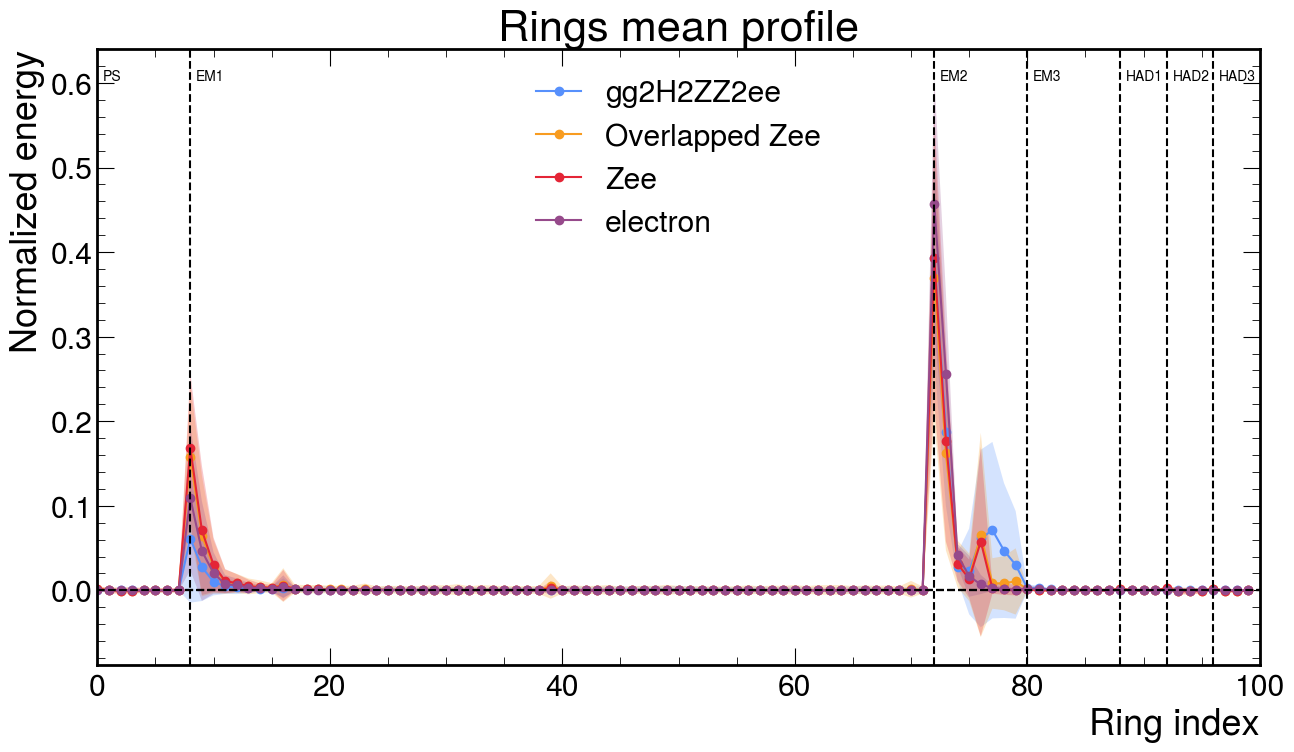

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
n_datasets = len(datasets)
for i, (label, row) in enumerate(datasets.iterrows()):
    pdf = pdfs[label]
    hplt.plot_rings_profile(pdf[rings_cols], ax, normalize=True, label=label, add_rings_labels=(i ==  n_datasets-1))
fig.savefig(os.path.join(output_dir, 'rings_profile_comparison.png'), bbox_inches='tight', dpi=300)